In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, pacf, acf

#ARIMA model
from statsmodels.tsa.arima_model import ARIMA

#SARIMA MODEL
from statsmodels.tsa.statespace.sarimax import SARIMAX

#plotting acf and pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing


# pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# ACF and PACF charts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# SARIMA/SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# MSE/RMSE
from sklearn.metrics import mean_squared_error

## Reading the data

In [ ]:
#reading the file
storesales=("/content/drive/MyDrive/Mini_Project/DS3_C6_S4_TimeSeries_Sales_Data_Project.xls")
storesales_data= pd.read_excel(storesales, parse_dates=True, index_col='Order Date')
storesales_data.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# size of data
storesales_data.shape

(9994, 20)

In [ ]:
# copy of data
df = storesales_data.copy()

In [ ]:
# checking for null values
df.isnull().sum()

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There is no missing value present in dataset so we can skip missing value treatment.

In [ ]:
# selecting records which are having furniture category
dff = df[df["Category"]== 'Furniture']
dff.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
dff.shape

(2121, 20)

In [ ]:
# ordering the records by date in ascending order
dff = dff.sort_values(by='Order Date', ascending = True)
dff.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-06,7475,CA-2014-167199,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
2014-01-07,7661,CA-2014-105417,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
2014-01-10,867,CA-2014-149020,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,Virginia,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
2014-01-11,717,CA-2014-130092,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,Delaware,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
2014-01-13,2979,CA-2014-109232,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,South Carolina,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504


In [ ]:
# Resampling the data with month-wise
dffm = dff.resample('MS').sum()
dffm.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-01,88666,1060353,6242.525,70,2.70,805.4665
2014-02-01,44473,464076,1839.658,23,0.80,120.6917
2014-03-01,192586,1914913,14573.956,131,7.60,-1128.6550
2014-04-01,125557,1702707,7944.837,81,3.45,554.3801
2014-05-01,115362,1380475,6912.787,97,6.15,-349.8776


In [ ]:
storesales = dffm.groupby('Order Date')['Sales'].sum().reset_index()
data = storesales.set_index('Order Date')
data.head()

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


In [ ]:
data = dffm['Sales']
data.head()

Order Date
2014-01-01     6242.525
2014-02-01     1839.658
2014-03-01    14573.956
2014-04-01     7944.837
2014-05-01     6912.787
Freq: MS, Name: Sales, dtype: float64

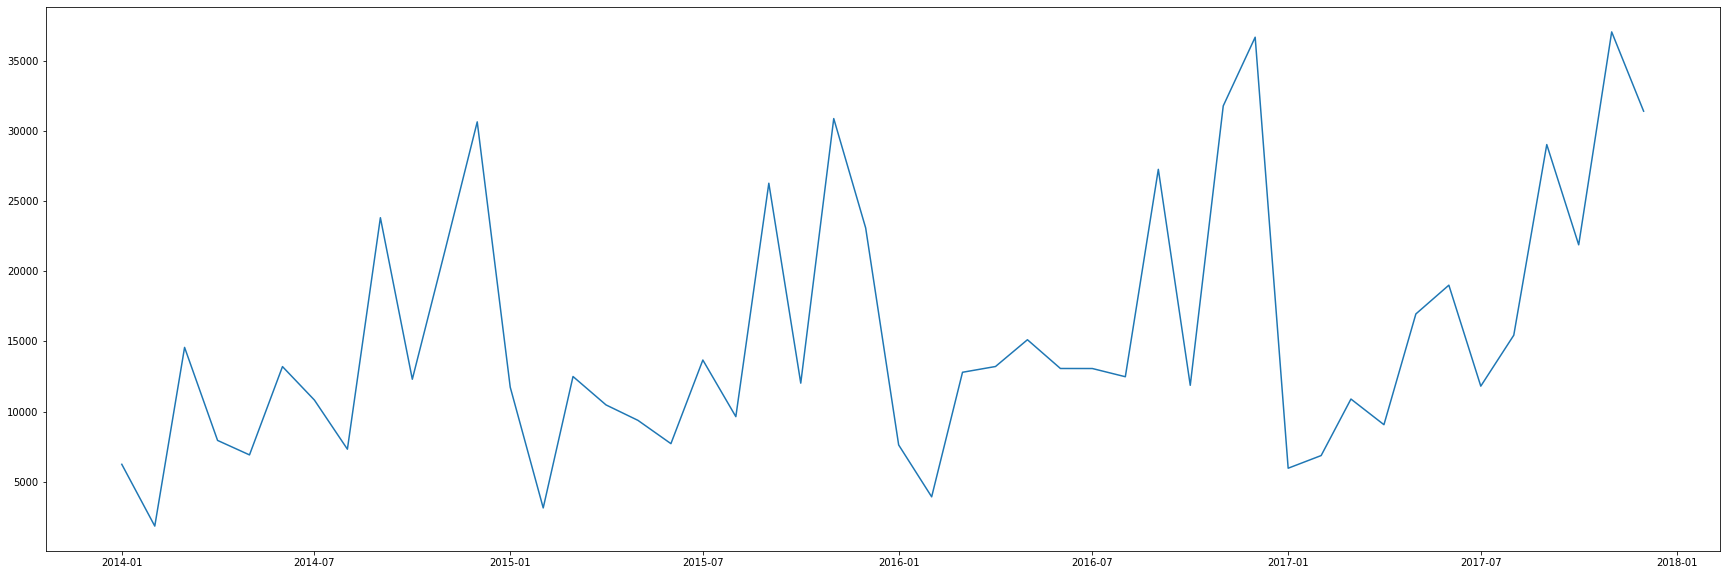

In [ ]:
# plotting the data
plt.figure(figsize=(30,10))
plt.plot(data)

## Characteristics of time series


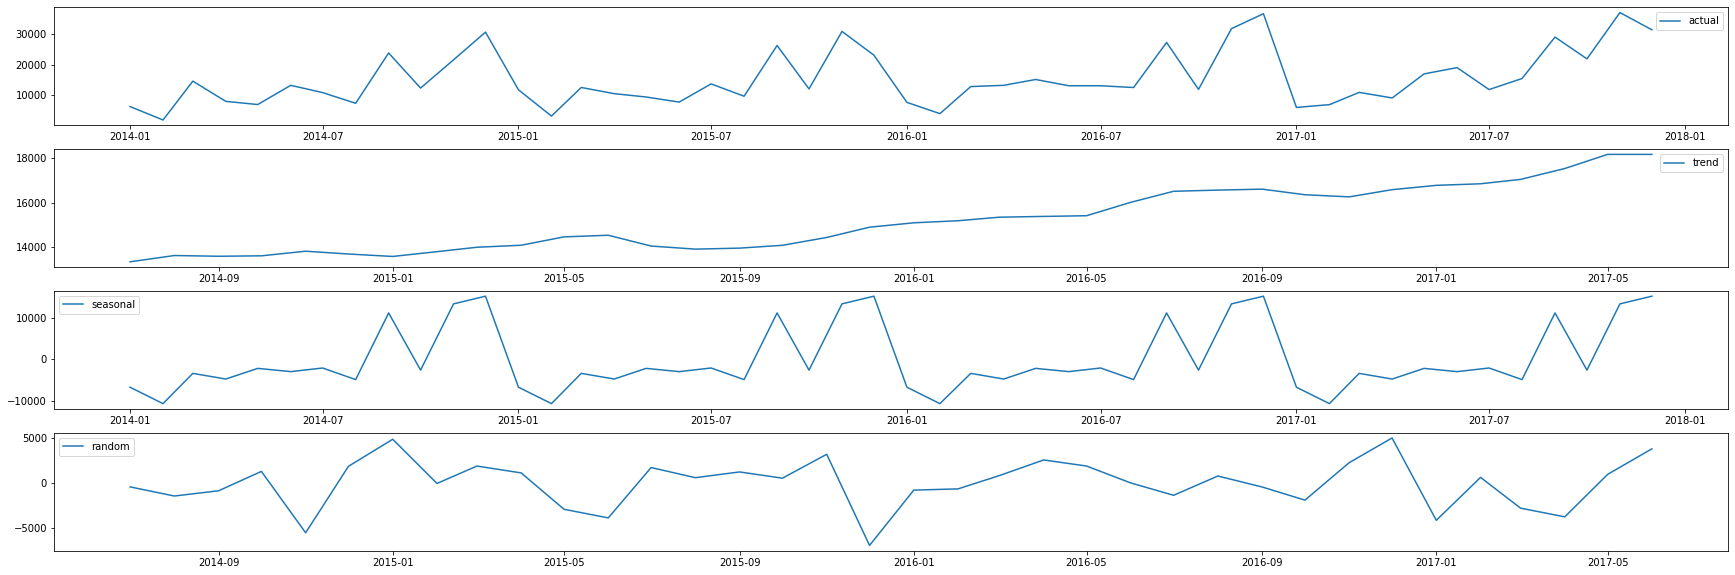

In [ ]:
#Decomposing the data using seasonal decompose
#data= storesales.Sales
decompose= seasonal_decompose(data,period=12)

d_trend= decompose.trend
d_seasonal= decompose.seasonal
d_random= decompose.resid

#visualization
fig,ax= plt.subplots(4,1, figsize=(30,10))
plt.subplot(411)
plt.plot(data, label='actual')
plt.legend()

plt.subplot(412)
plt.plot(d_trend, label='trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal, label='seasonal')
plt.legend()


plt.subplot(414)
plt.plot(d_random, label='random')
plt.legend()

#### Trend is going upward
#### Data is following the seasonality

In [ ]:
# Checking for Stationary
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        ret = "Data is Stationary. Proceed to model building"
    else:
        ret = "Data is not Stationary. Make is stationary"
        
    return(ret)

In [ ]:
checkStationarity(data)

'Data is Stationary. Proceed to model building'

In [ ]:
d_acf = acf(data)  # nlags -> number of lags. default=40. can override this  # acf(fb, nlags=20)
d_pacf = pacf(data)

Text(0.5, 1.0, 'Partial Auto Correlation Function')

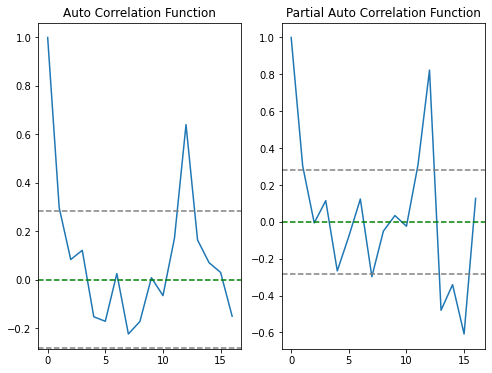

In [ ]:
# plot the ACF / PACF

fig,ax = plt.subplots(figsize=(8,6))

plt.subplot(121)
plt.plot(d_acf)
plt.axhline(y=0, linestyle="--",color="green")
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle="--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle="--", color="gray")
plt.title("Auto Correlation Function")

plt.subplot(122)
plt.plot(d_pacf)
plt.axhline(y=0, linestyle="--",color="green")
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle="--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle="--", color="gray")
plt.title("Partial Auto Correlation Function")

In [ ]:
p = 3
q = 5

In [ ]:
#splitting the data
ratio = 0.7
rows = int(ratio * len(data))
train = data[:rows]
test = data[rows:]

print("Total={}, Train={}, Test={}".format(len(data), len(train), len(test)))

Total=48, Train=33, Test=15


# ARMA Model

In [ ]:
m1 = ARIMA(train,order=(p,0,q)).fit()

In [ ]:
# summarise the model
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(3, 0, 5)   Log Likelihood                -336.334
Date:                Tue, 09 Aug 2022   AIC                            692.668
Time:                        06:03:58   BIC                            707.633
Sample:                    01-01-2014   HQIC                           697.703
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.352e+04   1244.878     10.863      0.000    1.11e+04     1.6e+04
ar.L1          0.7145      0.214      3.335      0.001       0.295       1.134
ar.L2          0.7212      0.156      4.617      0.000       0.415       1.027
ar.L3         -0.9878      0.125     -7.926      0.000      -1.232      -0.743
ma.L1         -0.6415      1.034     -0.620      0.535      -2.669       1.386
ma.L2         -1.1340      1.154     -0.982      0.326      -3.397       1.129
ma.L3          1.1809      0.975      1.211      0.226      -0.730       3.092
ma.L4          0.3195      0.567      0.563      0.573      -0.792       1.431
ma.L5         -0.4108      0.507     -0.810      0.418      -1.405       0.583
sigma2      4.915e+07      0.006   8.74e+09      0.000    4.92e+07    4.92e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.99   Prob(JB):                         0.40
Heteroskedasticity (H):               1.08   Skew:                             0.57
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.91e+26. Standard errors may be unstable.
"""

In [ ]:
# get the AIC/BIC scores

aic1,bic1 = np.round(m1.aic,2), np.round(m1.bic,2)
print("Model 1: AIC={},BIC={}".format(aic1,bic1))

Model 1: AIC=692.67,BIC=707.63


In [ ]:
pvalue = sm.stats.acorr_ljungbox(m1.resid, lags=[1], return_df=True)['lb_pvalue'].values

if pvalue < 0.05:
    print("Not a good model")
else:
    print("Good model")

Good model


In [ ]:
# forecast on the test data
f1 = m1.predict(start=0,end=len(test)-1)
print(f1.head())

2014-01-01    13523.605725
2014-02-01    12506.512550
2014-03-01    12619.112374
2014-04-01    15228.354964
2014-05-01    12884.768054
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# store actual and predicted data in dataframe
actual=[]; pred=[]

for i in range(len(f1)):
    actual.append(test.Sales[i])
    pred.append(f1[i])
    
df1 = pd.DataFrame({'actual':actual, 'forecast':pred})
df1['error'] = df1.actual - df1.forecast
print(df1)

        actual      forecast         error
0   11872.5770  13523.605725  -1651.028725
1   31783.6288  12506.512550  19277.116250
2   36678.7150  12619.112374  24059.602626
3    5964.0320  15228.354964  -9264.322964
4    6866.3374  12884.768054  -6018.430654
5   10893.4448  15231.695028  -4338.250228
6    9065.9581  17961.018071  -8895.059971
7   16957.5582  16737.759064    219.799136
8   19008.5867  19338.702248   -330.115548
9   11813.0220  20077.628981  -8264.606981
10  15441.8740  15760.450025   -318.576025
11  29028.2060  16809.834129  12218.371871
12  21884.0682  13832.060689   8052.007511
13  37056.7150   6201.093959  30855.621041
14  31407.4668  11404.438889  20003.027911


In [ ]:
# Calcualating the MSE
mse1 = mean_squared_error(df1.actual, df1.forecast)
print("ARMA Model 1. p={},q={} \n\tMSE = {} \n\tRMSE = {}".format(p,q,mse1, np.sqrt(mse1))  )

ARMA Model 1. p=3,q=5 
	MSE = 187204379.89819995 
	RMSE = 13682.265159621778


Text(0.5, 1.0, 'ARMA model 1')

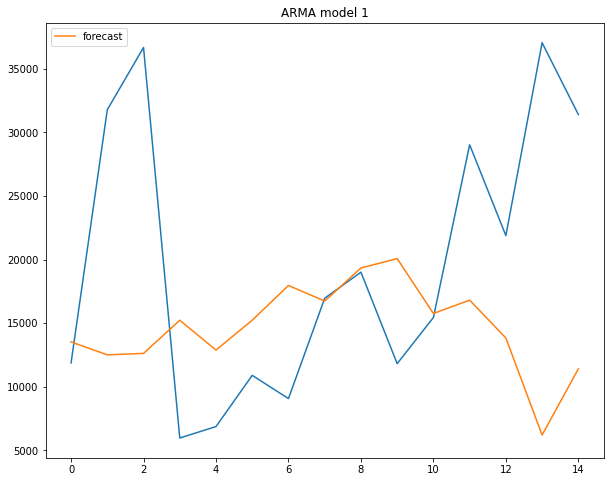

In [ ]:
# plot the actual and forecast data
df1.actual.plot(figsize=(10,8))
df1.forecast.plot(legend=True)
plt.title("ARMA model 1")

# ARIMA Model

In [ ]:
# taking some initial values for p and q
p=1; q=1; d=1

In [ ]:
m2 = ARIMA(train['Sales'],order=(p,d,q)).fit()

In [ ]:
# summarise the ARIMA model
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   33
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -333.210
Date:                Tue, 09 Aug 2022   AIC                            672.420
Time:                        06:28:43   BIC                            676.817
Sample:                    01-01-2014   HQIC                           673.877
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1948      0.335      0.581      0.561      -0.462       0.852
ma.L1         -0.8895      0.160     -5.568      0.000      -1.203      -0.576
sigma2      7.418e+07   3.65e-10   2.03e+17      0.000    7.42e+07    7.42e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 2.29
Prob(Q):                              0.70   Prob(JB):                         0.32
Heteroskedasticity (H):               0.89   Skew:                             0.62
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.69e+33. Standard errors may be unstable.
"""

In [ ]:
# get the AIC/BIC scores

aic2,bic2 = np.round(m1.aic,2), np.round(m2.bic,2)
print("Model 2: AIC={},BIC={}".format(aic2,bic2))

Model 2: AIC=692.67,BIC=676.82


In [ ]:
pvalue = sm.stats.acorr_ljungbox(m2.resid, lags=[1], return_df=True)['lb_pvalue'].values

if pvalue < 0.05:
    print("Not a good model")
else:
    print("Good model")

Good model


In [ ]:
# forecast
start = len(train); end=len(train)+len(test)-1
print("START={}, END={}".format(start,end))

START=33, END=47


In [ ]:
f2 = m2.predict(start,end,typ="levels")
print(f2.head())

2016-10-01    17696.416427
2016-11-01    15832.577684
2016-12-01    15469.445110
2017-01-01    15398.695821
2017-02-01    15384.911704
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# store actual and predicted data in dataframe
actual=[]; pred=[]

for i in range(len(f2)):
    actual.append(test.Sales[i])
    pred.append(f2[i])
    
df2 = pd.DataFrame({'actual':actual, 'forecast':pred})
df2['error'] = df2.actual - df2.forecast
print(df2)

        actual      forecast         error
0   11872.5770  17696.416427  -5823.839427
1   31783.6288  15832.577684  15951.051116
2   36678.7150  15469.445110  21209.269890
3    5964.0320  15398.695821  -9434.663821
4    6866.3374  15384.911704  -8518.574304
5   10893.4448  15382.226138  -4488.781338
6    9065.9581  15381.702908  -6315.744808
7   16957.5582  15381.600967   1575.957233
8   19008.5867  15381.581106   3627.005594
9   11813.0220  15381.577236  -3568.555236
10  15441.8740  15381.576482     60.297518
11  29028.2060  15381.576335  13646.629665
12  21884.0682  15381.576307   6502.491893
13  37056.7150  15381.576301  21675.138699
14  31407.4668  15381.576300  16025.890500


In [ ]:
# Calcualate the MSE
mse2 = mean_squared_error(df2.actual, df2.forecast)
print("ARIMA Model 1. p={},q={} \n\tMSE = {} \n\tRMSE = {}".format(p,q,mse2, np.sqrt(mse2))  )

ARIMA Model 1. p=1,q=1 
	MSE = 129555585.70851329 
	RMSE = 11382.248710536653


Text(0.5, 1.0, 'ARIMA model ')

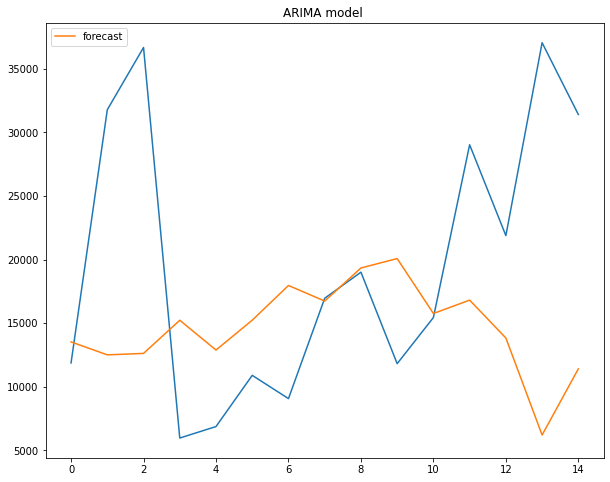

In [ ]:
# plot the actual and forecast data
df1.actual.plot(figsize=(10,8))
df1.forecast.plot(legend=True)
plt.title("ARIMA model ")

# SARIMAX Model

In [ ]:
# build the SARIMA model with some initial values for p and q
p=1; d=0; q=0

In [ ]:
# model 3
sm1 = SARIMAX(train,order=(p,d,q),seasonal_order=(p,d,q,30)).fit()

In [ ]:
sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   33
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 30)   Log Likelihood                -347.639
Date:                            Tue, 09 Aug 2022   AIC                            701.278
Time:                                    06:49:17   BIC                            705.767
Sample:                                01-01-2014   HQIC                           702.788
                                     - 09-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8104      0.135      6.015      0.000       0.546       1.074
ar.S.L30       0.3474      0.348      0.998      0.318      -0.335       1.030
sigma2      8.509e+07    3.6e-09   2.36e+16      0.000    8.51e+07    8.51e+07
===================================================================================
Ljung-Box (L1) (Q):                   5.65   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.02   Prob(JB):                         0.68
Heteroskedasticity (H):               1.15   Skew:                             0.28
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.23e+31. Standard errors may be unstable.
"""

In [ ]:
# forecast
f3 = sm1.forecast(len(test))

In [ ]:
(len(f3), len(test))

(15, 15)

In [ ]:
# Calcualate the MSE and RMSE
mse3 = mean_squared_error(test, f3)
print("SARIMAX Model 1. p={},q={} \n\tMSE = {} \n\tRMSE = {}".format(p,q,mse3, np.sqrt(mse3)))

SARIMAX Model 1. p=1,q=0 
	MSE = 243921632.1297885 
	RMSE = 15617.99065596431


Text(0.5, 1.0, 'SARIMA Model. Forecast Comparison of Energy Appliances')

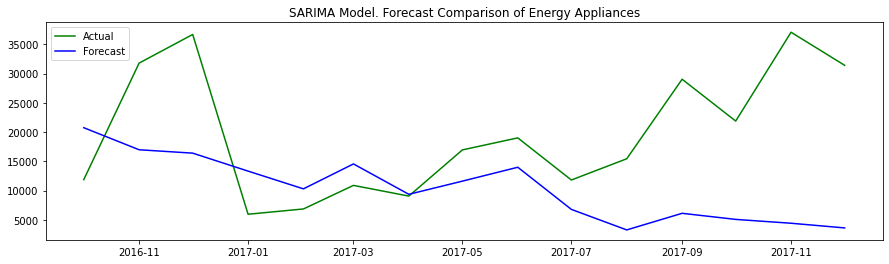

In [ ]:
# plot the actual and forecast data (SARIMA)
plt.figure(figsize=(15,4))
plt.plot(test,'g',label='Actual')
plt.plot(f3,'b',label='Forecast')
plt.legend()
plt.title("SARIMA Model")